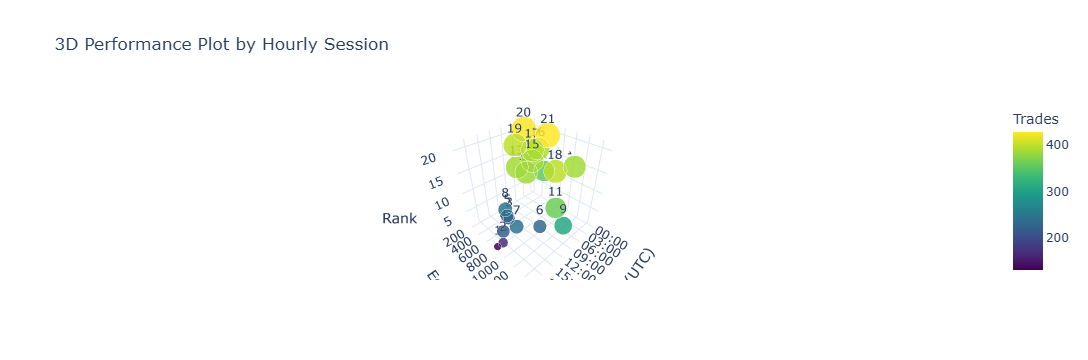

In [1]:
import pandas as pd
import plotly.graph_objects as go
from io import StringIO

# ---------------------------
# 1. CSV Data (embedded)
# ---------------------------
csv_data = """
Rank,Session Start,Session End,Equity,Trades
1,20:00,21:00,812.3243254,130
2,19:00,20:00,857.5294073,170
3,14:00,15:00,603.1843095,202
4,18:00,19:00,798.1902598,221
5,15:00,16:00,650.1141337,228
6,13:00,14:00,1175.56929,230
7,17:00,18:00,1010.071902,243
8,16:00,17:00,708.1158584,245
9,12:00,13:00,1495.813783,309
10,1:00,2:00,524.7783349,355
11,11:00,12:00,1313.135488,361
12,7:00,8:00,512.7152816,384
13,8:00,9:00,380.9657206,386
14,0:00,1:00,1049.417423,386
15,6:00,7:00,577.5135022,388
16,2:00,3:00,443.6543421,393
17,5:00,6:00,515.5098371,397
18,10:00,11:00,1216.246919,398
19,9:00,10:00,437.7753629,399
20,3:00,4:00,195.9143007,427
21,4:00,5:00,736.8399835,428
"""

# ---------------------------
# 2. Read & sort the data
# ---------------------------
df = pd.read_csv(StringIO(csv_data))
df['Session Start Time'] = pd.to_datetime(df['Session Start'], format='%H:%M')
df = df.sort_values('Session Start Time').reset_index(drop=True)
df['Session Start'] = df['Session Start Time'].dt.strftime('%H:%M')

# ---------------------------
# 3. 3D Bubble Chart
# ---------------------------
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=df['Session Start'],
    y=df['Equity'],
    z=df['Rank'],
    mode='markers+text',
    marker=dict(
        size=df['Trades'] / 15,   # bubble size scale
        color=df['Trades'],       # color by trades
        colorscale='Viridis',
        opacity=0.85,
        colorbar=dict(title='Trades')
    ),
    text=df['Rank'],              # rank label
    textposition='top center',
    hovertemplate=
        "<b>Session:</b> %{x}<br>" +
        "<b>Equity:</b> %{y}<br>" +
        "<b>Rank:</b> %{z}<br>" +
        "<b>Trades:</b> %{marker.size}<br>" +
        "<b>Session End:</b> %{customdata[0]}",
    customdata=df[['Session End']]
))

fig.update_layout(
    title="3D Performance Plot by Hourly Session",
    scene=dict(
        xaxis_title="Session (UTC)",
        yaxis_title="Equity",
        zaxis_title="Rank"
    ),
    template="plotly_white"
)

fig.show()


In [18]:
import pandas as pd
import plotly.graph_objects as go
from io import StringIO

# ---------------------------
# 1. CSV Data (embedded)
# ---------------------------
csv_data = """
Rank,Session Start,Session End,Equity,Trades
1,20:00,21:00,812.3243254,130
2,19:00,20:00,857.5294073,170
3,14:00,15:00,603.1843095,202
4,18:00,19:00,798.1902598,221
5,15:00,16:00,650.1141337,228
6,13:00,14:00,1175.56929,230
7,17:00,18:00,1010.071902,243
8,16:00,17:00,708.1158584,245
9,12:00,13:00,1495.813783,309
10,1:00,2:00,524.7783349,355
11,11:00,12:00,1313.135488,361
12,7:00,8:00,512.7152816,384
13,8:00,9:00,380.9657206,386
14,0:00,1:00,1049.417423,386
15,6:00,7:00,577.5135022,388
16,2:00,3:00,443.6543421,393
17,5:00,6:00,515.5098371,397
18,10:00,11:00,1216.246919,398
19,9:00,10:00,437.7753629,399
20,3:00,4:00,195.9143007,427
21,4:00,5:00,736.8399835,428
"""

# ---------------------------
# 2. DataFrame
# ---------------------------
df = pd.read_csv(StringIO(csv_data))
df['Session Start Time'] = pd.to_datetime(df['Session Start'], format='%H:%M')
df = df.sort_values('Session Start Time').reset_index(drop=True)
df['Session Start'] = df['Session Start Time'].dt.strftime('%H:%M')

# ---------------------------
# 3. 3D Scatter (Rank = Z)
# ---------------------------
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=df['Session Start'],
    y=df['Equity'],
    z=df['Rank'],
    mode='markers+text',
    text=df['Rank'],
    textposition='middle center',
    marker=dict(
        size=df['Trades'] / 15,   # Bubble size
        color=df['Trades'],
        colorscale='Viridis',
        opacity=0.85,
        colorbar=dict(title='Trades')
    ),
    hovertemplate=
        "<b>Session:</b> %{x}<br>" +
        "<b>Equity:</b> %{y}<br>" +
        "<b>Rank:</b> %{z}<br>" +
        "<b>Trades:</b> %{marker.color}<extra></extra>"
))

# ---------------------------
# 4. Layout (bigger chart)
# ---------------------------
fig.update_layout(
    title='3D Performance Chart (Session vs Equity vs Rank)',
    template='plotly_white',
    scene=dict(
        xaxis_title='Session Start',
        yaxis_title='Equity',
        zaxis_title='Rank',
        xaxis=dict(tickangle=90)
    ),
    width=800,   # bigger width
    height=800,   # bigger height
    margin=dict(l=20, r=20, t=60, b=20)
)

fig.show()


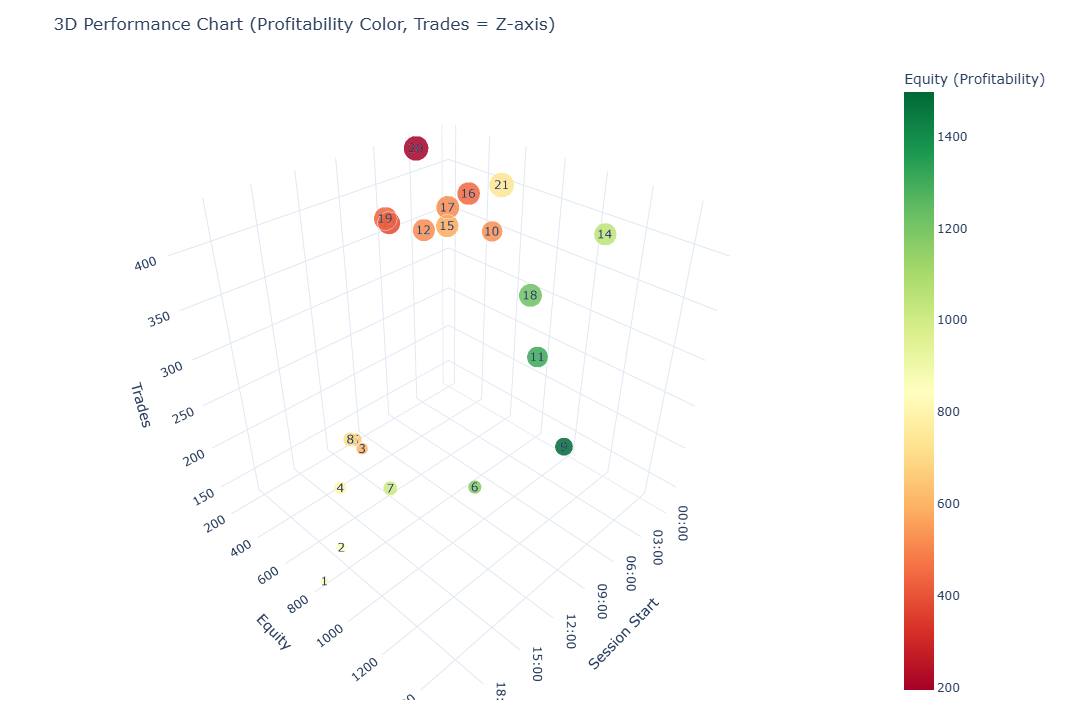

In [7]:
import pandas as pd
import plotly.graph_objects as go
from io import StringIO

# ---------------------------
# 1. CSV Data (embedded)
# ---------------------------
csv_data = """
Rank,Session Start,Session End,Equity,Trades
1,20:00,21:00,812.3243254,130
2,19:00,20:00,857.5294073,170
3,14:00,15:00,603.1843095,202
4,18:00,19:00,798.1902598,221
5,15:00,16:00,650.1141337,228
6,13:00,14:00,1175.56929,230
7,17:00,18:00,1010.071902,243
8,16:00,17:00,708.1158584,245
9,12:00,13:00,1495.813783,309
10,1:00,2:00,524.7783349,355
11,11:00,12:00,1313.135488,361
12,7:00,8:00,512.7152816,384
13,8:00,9:00,380.9657206,386
14,0:00,1:00,1049.417423,386
15,6:00,7:00,577.5135022,388
16,2:00,3:00,443.6543421,393
17,5:00,6:00,515.5098371,397
18,10:00,11:00,1216.246919,398
19,9:00,10:00,437.7753629,399
20,3:00,4:00,195.9143007,427
21,4:00,5:00,736.8399835,428
"""

# ---------------------------
# 2. DataFrame
# ---------------------------
df = pd.read_csv(StringIO(csv_data))
df['Session Start Time'] = pd.to_datetime(df['Session Start'], format='%H:%M')
df = df.sort_values('Session Start Time').reset_index(drop=True)
df['Session Start'] = df['Session Start Time'].dt.strftime('%H:%M')

# ---------------------------
# 3. 3D Scatter (Trades = Z, Color = Equity Profitability)
# ---------------------------
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=df['Session Start'],
    y=df['Equity'],
    z=df['Trades'],                # Z-axis = number of trades
    mode='markers+text',
    text=df['Rank'],               # rank inside the bubbles
    textposition='middle center',
    marker=dict(
        size=df['Trades'] / 15,    # bubble size depending on trade count
        color=df['Equity'],        # color based on profitability (equity)
        colorscale='RdYlGn',       # red = low profit, green = high profit
        opacity=0.85,
        colorbar=dict(title='Equity (Profitability)')
    ),
    hovertemplate=
        "<b>Session:</b> %{x}<br>" +
        "<b>Equity:</b> %{y}<br>" +
        "<b>Trades:</b> %{z}<br>" +
        "<b>Rank:</b> %{text}<extra></extra>"
))

# ---------------------------
# 4. Layout
# ---------------------------
fig.update_layout(
    title='3D Performance Chart (Profitability Color, Trades = Z-axis)',
    template='plotly_white',
    scene=dict(
        xaxis_title='Session Start',
        yaxis_title='Equity',
        zaxis_title='Trades',
        xaxis=dict(tickangle=90)
    ),
    width=1100,
    height=700,
    margin=dict(l=20, r=20, t=60, b=20)
)

fig.show()


In [22]:
import pandas as pd
import plotly.graph_objects as go
from io import StringIO

# ---------------------------
# 1. CSV Data (embedded)
# ---------------------------
csv_data = """
Rank,Session Start,Session End,Equity,Trades
1,20:00,21:00,812.3243254,130
2,19:00,20:00,857.5294073,170
3,14:00,15:00,603.1843095,202
4,18:00,19:00,798.1902598,221
5,15:00,16:00,650.1141337,228
6,13:00,14:00,1175.56929,230
7,17:00,18:00,1010.071902,243
8,16:00,17:00,708.1158584,245
9,12:00,13:00,1495.813783,309
10,1:00,2:00,524.7783349,355
11,11:00,12:00,1313.135488,361
12,7:00,8:00,512.7152816,384
13,8:00,9:00,380.9657206,386
14,0:00,1:00,1049.417423,386
15,6:00,7:00,577.5135022,388
16,2:00,3:00,443.6543421,393
17,5:00,6:00,515.5098371,397
18,10:00,11:00,1216.246919,398
19,9:00,10:00,437.7753629,399
20,3:00,4:00,195.9143007,427
21,4:00,5:00,736.8399835,428
"""

# ---------------------------
# 2. DataFrame
# ---------------------------
df = pd.read_csv(StringIO(csv_data))

# Convert and sort by time
df['Session Start Time'] = pd.to_datetime(df['Session Start'], format='%H:%M')
df = df.sort_values('Session Start Time').reset_index(drop=True)
df['Session Start'] = df['Session Start Time'].dt.strftime('%H:%M')

# ---------------------------
# 3. Recompute Ranking Based on Profitability (Equity)
# ---------------------------
df = df.sort_values('Equity', ascending=False).reset_index(drop=True)
df['Profit Rank'] = df.index + 1  # 1 = highest equity

# ---------------------------
# 4. 3D Scatter (Profitability-Based)
# ---------------------------
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=df['Session Start'],
    y=df['Equity'],
    z=df['Trades'],                  # Z-axis = trades (unchanged)
    mode='markers+text',
    text=df['Profit Rank'],          # NEW: profitability-based rank inside bubble
    textposition='middle center',
    marker=dict(
        size=df['Equity'] / df['Equity'].max() * 25 + 5,   # bubble size scaled by profitability
        color=df['Equity'],                                # color = profitability
        colorscale='RdYlGn',                               # more green = more profitable
        opacity=0.90,
        colorbar=dict(title='Profitability')
    ),
    hovertemplate=
        "<b>Session:</b> %{x}<br>" +
        "<b>Equity:</b> %{y}<br>" +
        "<b>Trades:</b> %{z}<br>" +
        "<b>Profit Rank:</b> %{text}<extra></extra>"
))

# ---------------------------
# 5. Layout
# ---------------------------
fig.update_layout(
    title='3D Profitability Chart (Ranking & Bubble Size Based on Equity)',
    template='plotly_white',
    scene=dict(
        xaxis_title='Session Start',
        yaxis_title='Profitability',
        zaxis_title='Trades',
        xaxis=dict(tickangle=45)
    ),
    width=600,
    height=600,
    margin=dict(l=20, r=20, t=60, b=20)
)

fig.show()
